In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("../datasets/bike_buyers_clean.csv")
df = df.convert_dtypes()

In [6]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [7]:
ms =  df.groupby("Marital Status")

In [8]:
(ms.get_group("Married")["Purchased Bike"] == "Yes").sum()

232

<Axes: >

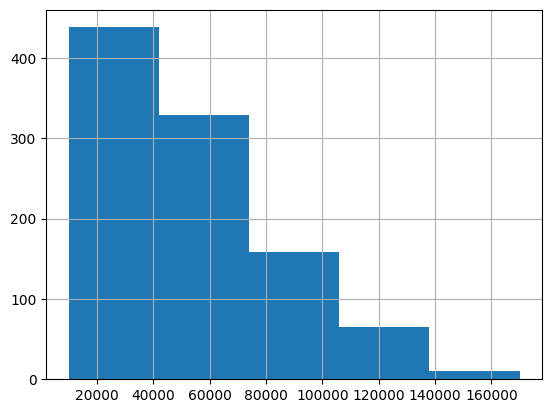

In [9]:
df.Income.hist(bins=5)

In [10]:
ic = 140000
(df[df.Income > ic ]["Purchased Bike"] == "Yes" ).sum() / df[df.Income > ic ]["Purchased Bike"].count() 

0.7

In [11]:
df.Income.count()

1000

In [12]:
df[df.Income > 60000 ].count()

ID                  356
Marital Status      356
Gender              356
Income              356
Children            356
Education           356
Occupation          356
Home Owner          356
Cars                356
Commute Distance    356
Region              356
Age                 356
Purchased Bike      356
dtype: int64

_______

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   Int64 
 1   Marital Status    1000 non-null   string
 2   Gender            1000 non-null   string
 3   Income            1000 non-null   Int64 
 4   Children          1000 non-null   Int64 
 5   Education         1000 non-null   string
 6   Occupation        1000 non-null   string
 7   Home Owner        1000 non-null   string
 8   Cars              1000 non-null   Int64 
 9   Commute Distance  1000 non-null   string
 10  Region            1000 non-null   string
 11  Age               1000 non-null   Int64 
 12  Purchased Bike    1000 non-null   string
dtypes: Int64(5), string(8)
memory usage: 106.6 KB


In [14]:
cat_df= df.select_dtypes("string")

In [15]:
cat_df

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,No
3,Single,Male,Bachelors,Professional,Yes,5-10 Miles,Pacific,Yes
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Yes
...,...,...,...,...,...,...,...,...
995,Married,Male,High School,Professional,Yes,2-5 Miles,North America,Yes
996,Single,Male,Graduate Degree,Professional,Yes,2-5 Miles,North America,Yes
997,Married,Male,Bachelors,Skilled Manual,Yes,0-1 Miles,North America,Yes
998,Single,Male,Bachelors,Management,No,1-2 Miles,North America,No


In [47]:
cat_df_features = cat_df.iloc[:, :-1]
cat_df_label = cat_df["Purchased Bike"]

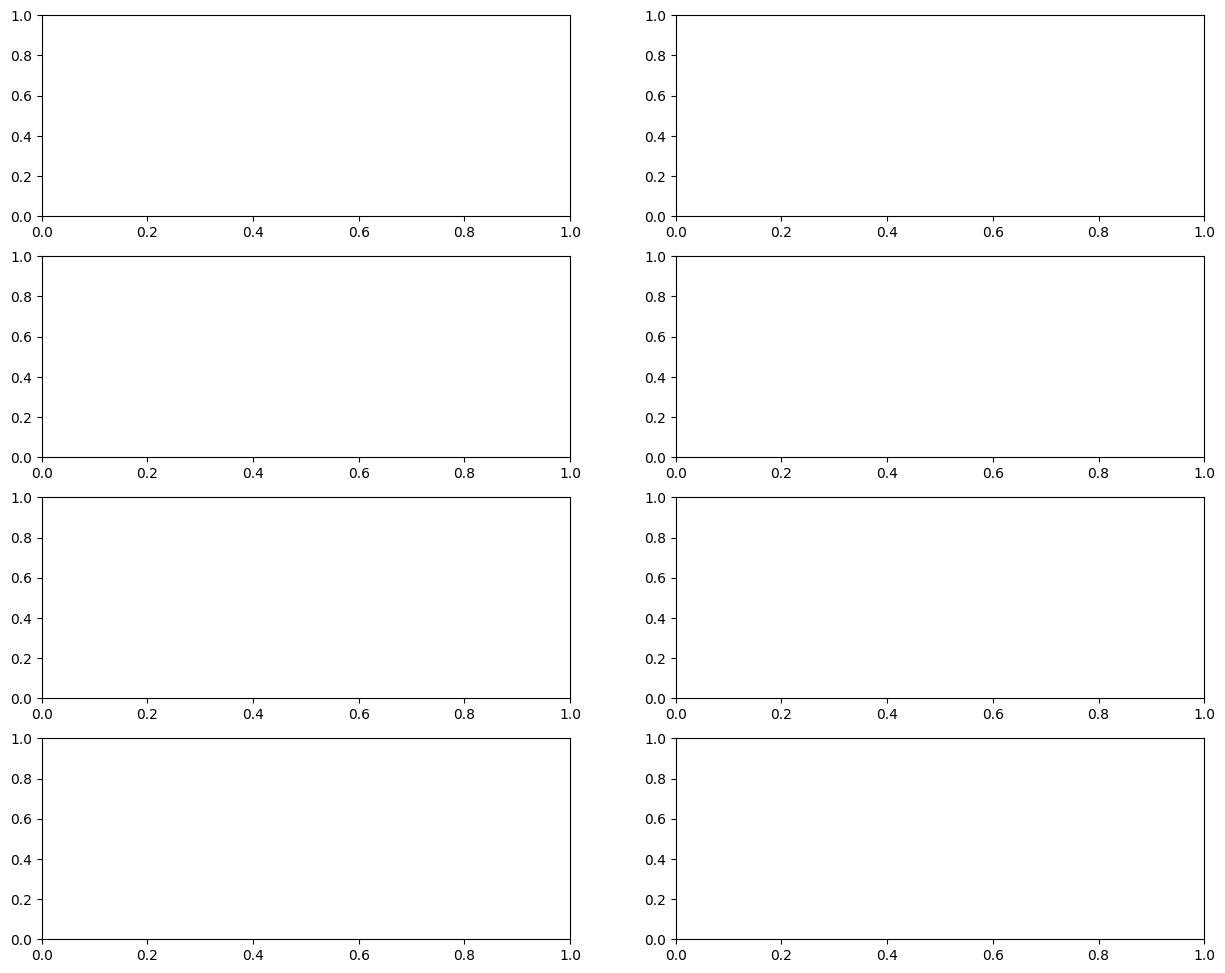

In [66]:
fig, axes = plt.subplots(figsize=(15, 3*4), nrows=4, ncols=2)


for col in cat_df_features.columns:
    pass

In [65]:
group = df.groupby("Education")
summary = group.apply(lambda x: x.groupby("Purchased Bike").count()["ID"])
summary["Proportion"] = summary["Yes"] / summary.sum(axis=1)
summary

Purchased Bike,No,Yes,Proportion
Education,,,
Bachelors,137,169,0.552288
Graduate Degree,80,94,0.540230
High School,100,79,0.441341
Partial College,146,119,0.449057
Partial High School,56,20,0.263158


Purchased Bike,No,Yes
Gender,,
Female,252,239
Male,267,242


In [ ]:
df["Purchased Bike"].